In [1]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np


As you examine the data, you begin to suspect that the dataset is fake. Maybe your boss gave you spurious data in order to test the data engineering skills of a new employee? To confirm your hunch, you decide to create a visualization of the data to present to your boss.

In [2]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:<'password'>@localhost:5432/<'my SQL Database'>')
con = engine.connect()

In [3]:
#create a employee dataframe from the SQL employees table 
employees = pd.DataFrame(pd.read_sql('select * from employees', con))
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#create a salary dataframe from the SQL salaries table 
salaries = pd.DataFrame(pd.read_sql('select * from salaries', con))
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [5]:
#merge the two dataframes on emp_no 
employee_salaries = employees.merge(salaries, on = 'emp_no')
employee_salaries.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


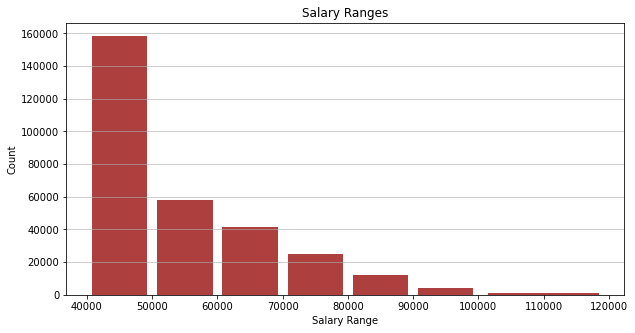

In [19]:
#Create a histogram to visualize the most common salary ranges for employees
plt.figure(figsize=(10,5))
bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000]
n, bins, patches = plt.hist(x=employee_salaries["salary"], bins = bins, color = 'brown', alpha=0.9, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.title('Salary Ranges')
plt.show()

The salary distribution seems off with over 100,000 employees falling betweek 40k and 50k but further analysis needs to be done to confirm this assumption.

In [7]:
#create a employee title dataframe from the SQL employees table 
employee_title = pd.DataFrame(pd.read_sql('select * from titles', con))
employee_title

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [10]:
#merge the employee_salaries dataframe with the employee_title dataframe on emp_title_id
title_salaries = employee_salaries.merge(employee_title, on = 'emp_title_id')
title_salaries.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [14]:

avg_salary= pd.DataFrame(title_salaries.groupby('title')['salary'].mean().round())
avg_salary

,salary
title,
Assistant Engineer,48564.0
Engineer,48535.0
Manager,51531.0
Senior Engineer,48507.0
Senior Staff,58550.0
Staff,58465.0
Technique Leader,48583.0


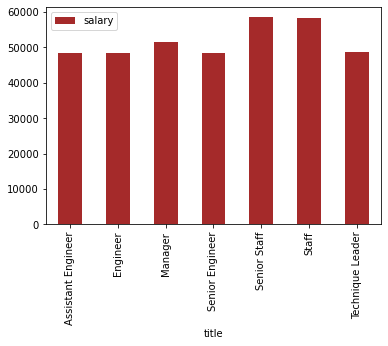

In [24]:
#Create a bar chart of average salary by title.
avg_salary.plot.bar(color="brown")

After grouping the average salary by employee title, it's now clear that this data is compromised and/or was not real (a test from the supervisor). Senior Engineers are making less than Assistant Engineers on average, Staff are making more than Managers, the averages do across these titles do not align with the histogram of distribution of funds. 